In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
url = "https://www.sastotickets.com/search/flight-tickets-from-Kathmandu-to-Pokhara-Jan-22-2023/2e7458dc-b562-4c52-8f56-d36b035ae0ad"

In [3]:
html = requests.get(url).content

In [4]:
#html

In [5]:
soup = BeautifulSoup(html, "html.parser")

In [6]:
#soup

In [7]:
form = soup.find_all("form")

In [8]:
#form

In [9]:
all_datapoints = list()
for datapoints in form:
    data = []
    for element in datapoints:
        data.append(element.text)
    all_datapoints.append(data)

In [10]:
# all_datapoints

In [11]:
# soup

In [12]:
paragraph = soup.find_all("p")

In [13]:
lis = []
for element in paragraph:
    lis.append(element.text.strip())

In [14]:
new_lis = lis[30:]

In [15]:
# new_lis

In [16]:
def flight_details(all_details):
    i = 0
    x = 16
    flights = []
    for index in range(len(all_details)):
        flight = []
        x += 16 
        while i<x:
            try: 
                flight.append(all_details[i])
                i += 1
            except:
                return flights
        flights.append(flight)
        

In [17]:
all_flight_details = list(flight_details(new_lis))

In [18]:
len(all_flight_details)

113

In [19]:
df = pd.DataFrame(all_flight_details)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Guna Airlines,"Ticket PriceNPR 3,350",Kathmandu (KTM),13:35,"Sun, Jan 22, 2023",Pokhara (PKR),13:58,"Sun, Jan 22, 2023",00 Hr 23 Min,5 Kg\n ...,...,13:40,"Sun, Jan 22, 2023",00 Hr 20 Min,5 Kg\n ...,"NPR 3,595",Non Refundable,flight details,Kathmandu(KTM)\n ...,Saurya Airlines\n ...,00 Hr 20 Min
1,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),07:00,"Sun, Jan 22, 2023",Pokhara (PKR),07:25,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,...,None,None,None,None,None,None,None,None,None,None
2,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),07:55,"Sun, Jan 22, 2023",Pokhara (PKR),08:20,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,...,None,None,None,None,None,None,None,None,None,None
3,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),08:40,"Sun, Jan 22, 2023",Pokhara (PKR),09:05,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,...,None,None,None,None,None,None,None,None,None,None
4,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),09:45,"Sun, Jan 22, 2023",Pokhara (PKR),10:10,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,...,None,None,None,None,None,None,None,None,None,None


In [21]:
df.shape

(113, 32)

In [22]:
df = df.drop(df.iloc[:, 15:],axis = 1)

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Guna Airlines,"Ticket PriceNPR 3,350",Kathmandu (KTM),13:35,"Sun, Jan 22, 2023",Pokhara (PKR),13:58,"Sun, Jan 22, 2023",00 Hr 23 Min,5 Kg\n ...,"NPR 3,350",Non Refundable,flight details,Kathmandu(KTM)\n ...,Guna Airlines\n ...
1,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),07:00,"Sun, Jan 22, 2023",Pokhara (PKR),07:25,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable,flight details,Kathmandu(KTM)\n ...,Buddha Air\n ...
2,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),07:55,"Sun, Jan 22, 2023",Pokhara (PKR),08:20,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable,flight details,Kathmandu(KTM)\n ...,Buddha Air\n ...
3,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),08:40,"Sun, Jan 22, 2023",Pokhara (PKR),09:05,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable,flight details,Kathmandu(KTM)\n ...,Buddha Air\n ...
4,Buddha Air,"Ticket PriceNPR 3,650",Kathmandu (KTM),09:45,"Sun, Jan 22, 2023",Pokhara (PKR),10:10,"Sun, Jan 22, 2023",00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable,flight details,Kathmandu(KTM)\n ...,Buddha Air\n ...


In [24]:
df = df.drop(columns = [1, 2, 5, 7, 12, 13, 14], axis =1)

In [25]:
df.head()

,0,3,4,6,8,9,10,11
0,Guna Airlines,13:35,"Sun, Jan 22, 2023",13:58,00 Hr 23 Min,5 Kg\n ...,"NPR 3,350",Non Refundable
1,Buddha Air,07:00,"Sun, Jan 22, 2023",07:25,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable
2,Buddha Air,07:55,"Sun, Jan 22, 2023",08:20,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable
3,Buddha Air,08:40,"Sun, Jan 22, 2023",09:05,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable
4,Buddha Air,09:45,"Sun, Jan 22, 2023",10:10,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable


In [26]:
df.columns = ["airlines", "departure", "date", "arrival", "duration", "luggage weight", "price", "Refund"]

In [27]:
df.head()

,airlines,departure,date,arrival,duration,luggage weight,price,Refund
0,Guna Airlines,13:35,"Sun, Jan 22, 2023",13:58,00 Hr 23 Min,5 Kg\n ...,"NPR 3,350",Non Refundable
1,Buddha Air,07:00,"Sun, Jan 22, 2023",07:25,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable
2,Buddha Air,07:55,"Sun, Jan 22, 2023",08:20,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable
3,Buddha Air,08:40,"Sun, Jan 22, 2023",09:05,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable
4,Buddha Air,09:45,"Sun, Jan 22, 2023",10:10,00 Hr 25 Min,5 Kg\n ...,"NPR 3,650",Non Refundable


In [28]:
df["date"].unique() #since the value has no variance so the column can be eliminated

array(['Sun, Jan 22, 2023'], dtype=object)

In [29]:
#handling price column
df["price"].unique()

array(['NPR 3,350', 'NPR 3,650', 'NPR 4,340', 'NPR 4,520', 'NPR 4,595',
       'NPR 4,600', 'NPR 4,641', 'NPR 4,865', 'NPR 4,891', 'NPR 4,900',
       'NPR 5,045', 'NPR 5,356', 'NPR 5,365', 'NPR 5,375', 'NPR 5,378',
       'NPR 5,386', 'NPR 5,806', 'NPR 5,815', 'NPR 5,850', 'NPR 5,857',
       'NPR 6,118', 'NPR 6,365', 'NPR 6,437'], dtype=object)

In [30]:
#handling price column
df["price"] = df["price"].str[4] + df["price"].str[6:]

In [31]:
#handling luggage weight
df["luggage weight"].unique()

array(['5 Kg\n                                                        \n\n 15 Kg',
       '5 Kg\n                                                        \n\n 20 Kg',
       '5 Kg\n                                                        \n\n 25 Kg'],
      dtype=object)

In [32]:
#handling luggage weight
df["luggage weight"] = df["luggage weight"].str[-5:-3]

In [33]:
df["luggage weight"].unique()

array(['15', '20', '25'], dtype=object)

In [34]:
df.head()

,airlines,departure,date,arrival,duration,luggage weight,price,Refund
0,Guna Airlines,13:35,"Sun, Jan 22, 2023",13:58,00 Hr 23 Min,15,3350,Non Refundable
1,Buddha Air,07:00,"Sun, Jan 22, 2023",07:25,00 Hr 25 Min,15,3650,Non Refundable
2,Buddha Air,07:55,"Sun, Jan 22, 2023",08:20,00 Hr 25 Min,15,3650,Non Refundable
3,Buddha Air,08:40,"Sun, Jan 22, 2023",09:05,00 Hr 25 Min,15,3650,Non Refundable
4,Buddha Air,09:45,"Sun, Jan 22, 2023",10:10,00 Hr 25 Min,15,3650,Non Refundable


In [35]:
#handling duration column
df.duration.unique()

array(['00 Hr 23 Min', '00 Hr 25 Min', '00 Hr 20 Min'], dtype=object)

In [36]:
df.duration = df.duration.str[6:8]

In [37]:
df.duration.unique()

array(['23', '25', '20'], dtype=object)

# Data visualization

<AxesSubplot: >

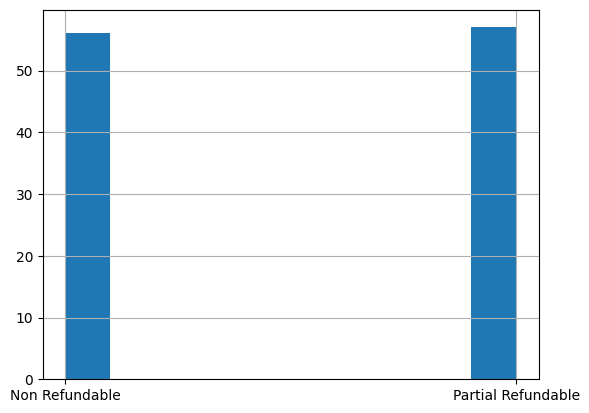

In [38]:
df.Refund.hist()

<AxesSubplot: >

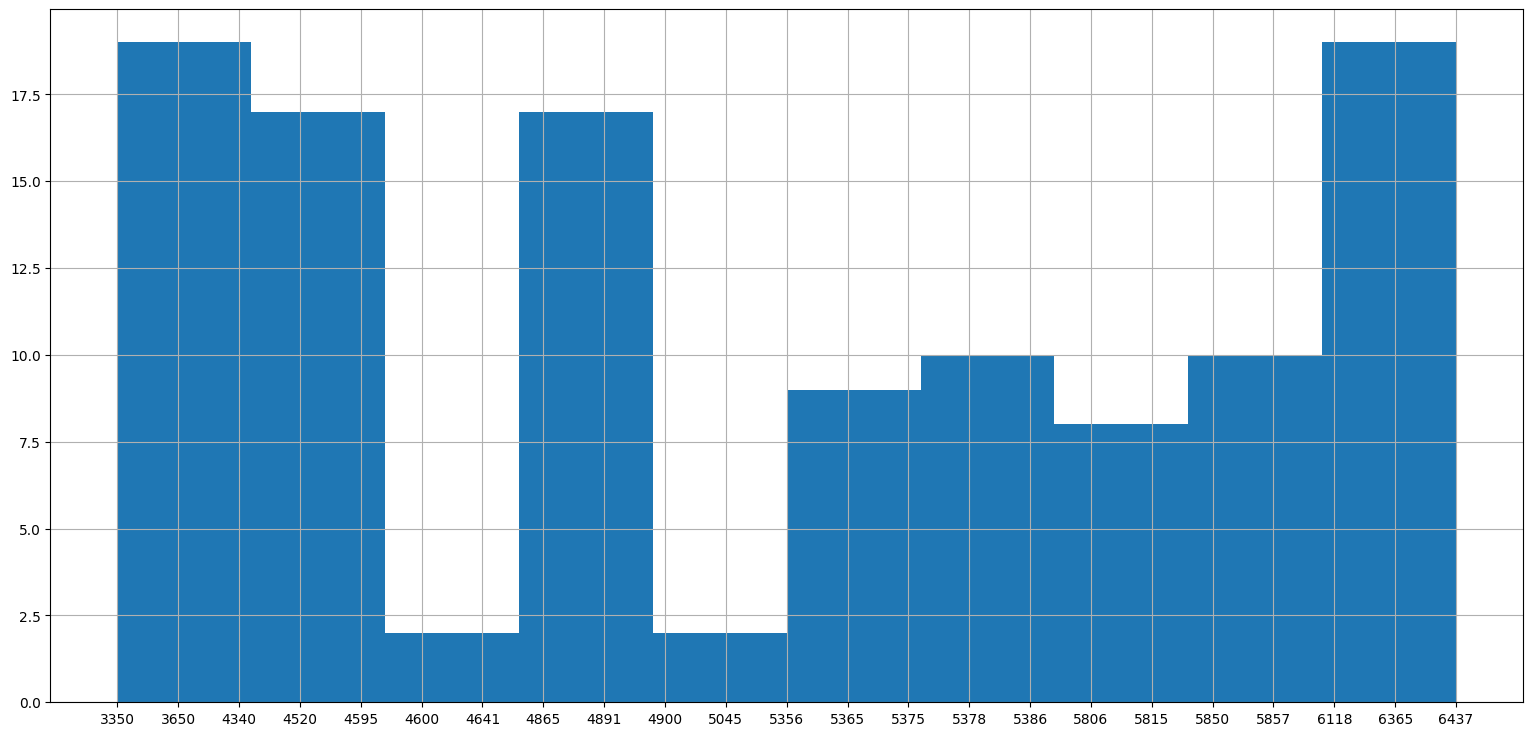

In [39]:
df.price.hist(figsize=(19,9))

In [40]:
#handing refund
df.Refund.unique()

array(['Non Refundable', 'Partial Refundable'], dtype=object)

In [41]:
df.Refund = np.where(df["Refund"] == "Non Refundable", 0, 1)

In [42]:
df.Refund.unique()

array([0, 1])

In [43]:
df.head()

,airlines,departure,date,arrival,duration,luggage weight,price,Refund
0,Guna Airlines,13:35,"Sun, Jan 22, 2023",13:58,23,15,3350,0
1,Buddha Air,07:00,"Sun, Jan 22, 2023",07:25,25,15,3650,0
2,Buddha Air,07:55,"Sun, Jan 22, 2023",08:20,25,15,3650,0
3,Buddha Air,08:40,"Sun, Jan 22, 2023",09:05,25,15,3650,0
4,Buddha Air,09:45,"Sun, Jan 22, 2023",10:10,25,15,3650,0


In [44]:
#handling date column
df["date"] = pd.to_datetime(df["date"])

In [45]:
df["date"]

0     2023-01-22
1     2023-01-22
2     2023-01-22
3     2023-01-22
4     2023-01-22
         ...    
108   2023-01-22
109   2023-01-22
110   2023-01-22
111   2023-01-22
112   2023-01-22
Name: date, Length: 113, dtype: datetime64[ns]

In [46]:
df["date"].unique()

array(['2023-01-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [47]:
#since date column has no variance in it so it can be dropped
df.drop("date", inplace = True, axis = 1)

In [48]:
df.head()

,airlines,departure,arrival,duration,luggage weight,price,Refund
0,Guna Airlines,13:35,13:58,23,15,3350,0
1,Buddha Air,07:00,07:25,25,15,3650,0
2,Buddha Air,07:55,08:20,25,15,3650,0
3,Buddha Air,08:40,09:05,25,15,3650,0
4,Buddha Air,09:45,10:10,25,15,3650,0


In [49]:
#handling departure and arrival
df.departure = pd.to_datetime(df["departure"])
df.arrival = pd.to_datetime(df["arrival"])

In [50]:
df["departure hour"] = df.departure.dt.hour
df["departure minute"] = df.departure.dt.minute
df["arrival hour"] = df.arrival.dt.hour
df["arrival minute"] = df.arrival.dt.minute

In [51]:
df.head()

,airlines,departure,arrival,duration,luggage weight,price,Refund,departure hour,departure minute,arrival hour,arrival minute
0,Guna Airlines,2023-01-20 13:35:00,2023-01-20 13:58:00,23,15,3350,0,13,35,13,58
1,Buddha Air,2023-01-20 07:00:00,2023-01-20 07:25:00,25,15,3650,0,7,0,7,25
2,Buddha Air,2023-01-20 07:55:00,2023-01-20 08:20:00,25,15,3650,0,7,55,8,20
3,Buddha Air,2023-01-20 08:40:00,2023-01-20 09:05:00,25,15,3650,0,8,40,9,5
4,Buddha Air,2023-01-20 09:45:00,2023-01-20 10:10:00,25,15,3650,0,9,45,10,10


In [52]:
df.drop(["departure", "arrival"], inplace = True, axis = 1)

In [53]:
df.head()

,airlines,duration,luggage weight,price,Refund,departure hour,departure minute,arrival hour,arrival minute
0,Guna Airlines,23,15,3350,0,13,35,13,58
1,Buddha Air,25,15,3650,0,7,0,7,25
2,Buddha Air,25,15,3650,0,7,55,8,20
3,Buddha Air,25,15,3650,0,8,40,9,5
4,Buddha Air,25,15,3650,0,9,45,10,10


In [54]:
airlines_with_encoding = pd.get_dummies(df.airlines)

In [55]:
airlines_with_encoding

,Buddha Air,Guna Airlines,Saurya Airlines,Shree Airlines,Yeti Airlines
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
108,1,0,0,0,0
109,1,0,0,0,0
110,1,0,0,0,0
111,1,0,0,0,0


In [56]:
df_final = pd.concat([df, airlines_with_encoding], axis = 1)

In [57]:
df_final.head()

,airlines,duration,luggage weight,price,Refund,departure hour,departure minute,arrival hour,arrival minute,Buddha Air,Guna Airlines,Saurya Airlines,Shree Airlines,Yeti Airlines
0,Guna Airlines,23,15,3350,0,13,35,13,58,0,1,0,0,0
1,Buddha Air,25,15,3650,0,7,0,7,25,1,0,0,0,0
2,Buddha Air,25,15,3650,0,7,55,8,20,1,0,0,0,0
3,Buddha Air,25,15,3650,0,8,40,9,5,1,0,0,0,0
4,Buddha Air,25,15,3650,0,9,45,10,10,1,0,0,0,0


In [58]:
df_final.drop("airlines", axis = 1, inplace = True)

In [59]:
df_final.head()

,duration,luggage weight,price,Refund,departure hour,departure minute,arrival hour,arrival minute,Buddha Air,Guna Airlines,Saurya Airlines,Shree Airlines,Yeti Airlines
0,23,15,3350,0,13,35,13,58,0,1,0,0,0
1,25,15,3650,0,7,0,7,25,1,0,0,0,0
2,25,15,3650,0,7,55,8,20,1,0,0,0,0
3,25,15,3650,0,8,40,9,5,1,0,0,0,0
4,25,15,3650,0,9,45,10,10,1,0,0,0,0


In [60]:
df_final.isnull().sum()

duration            0
luggage weight      0
price               0
Refund              0
departure hour      0
departure minute    0
arrival hour        0
arrival minute      0
Buddha Air          0
Guna Airlines       0
Saurya Airlines     0
Shree Airlines      0
Yeti Airlines       0
dtype: int64

In [61]:
X = df_final.drop("price", axis = 1)
y = df_final["price"]

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print(X_train.shape, X_test.shape)

(90, 12) (23, 12)


# Linear Regression

In [100]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [102]:
#Evaluating model
def eval_mod(y_pred, y_test):
    mse = mean_squared_error(y_pred, y_test)
    r2score = r2_score(y_pred, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    return mse, r2score, mae

In [103]:
mse, r2score, mae = eval_mod(y_pred, y_test)
print("mse:", mse, "R2score:", r2score, "mae:", mae)

mse: 315643.6516171776 R2score: 0.4800248695574123 mae: 461.07554982859693
